Weather Prediction

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the Dataset
data = pd.read_csv('weather.csv')

In [7]:
print(data.columns)


Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [8]:
data.columns = data.columns.str.strip()  # Remove any leading or trailing spaces from column names


In [12]:
# Step 3: Explore and Preprocess the Data
# Assuming 'weather' is the target column (whether it rained or not)
# If necessary, adjust column names for your dataset
X = data.drop(columns=['weather', 'date'])  # Drop 'weather' and 'date' columns from features
y = data['weather']  # 'weather' will be the target

# Optional: Check for missing values and handle them
print("\nMissing Values:\n", data.isnull().sum())
data = data.dropna()  # Remove rows with missing values if any

# Convert categorical features to numeric using encoding (for example, 'weather' is the target, so it will not be encoded here)
X = pd.get_dummies(X, drop_first=True)  # Apply one-hot encoding to categorical features (e.g., 'weather' is excluded from features)



Missing Values:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [10]:
# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Step 5: Train the Model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.8156996587030717

Classification Report:
               precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.40      0.08      0.13        25
        rain       0.92      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.78      0.82      0.78       293



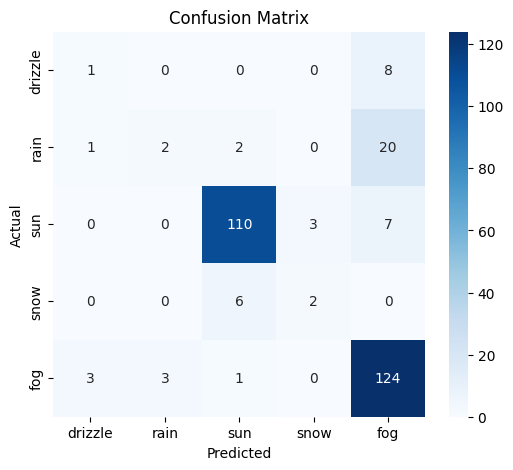

In [14]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['weather'].unique(), yticklabels=data['weather'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
# Step 7: Make Predictions
sample = X_test[:5]  # Take first 5 samples from test data
true_labels = y_test[:5]
predicted_labels = model.predict(sample)

print("True Labels:", true_labels)
print("Predicted Labels:", predicted_labels)

True Labels: 892      sun
1105    rain
413     rain
522      sun
1036    rain
Name: weather, dtype: object
Predicted Labels: ['sun' 'rain' 'rain' 'drizzle' 'rain']
